In [194]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression,ElasticNet
from sklearn.preprocessing import StandardScaler, scale
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeRegressor
from utils.utils import *

In [195]:
df = pd.read_excel("./Online Retail.xlsx")

In [196]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [197]:
df["order_value"] = df['Quantity'] * df['UnitPrice']

In [198]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [199]:
df["InvoiceNo"] = df["InvoiceNo"].astype('string')
df["StockCode"] = df['StockCode'].astype('string')
df['Description'] =df['Description'].astype('string')
df['Quantity'] = df['Quantity'].astype('int')
df['InvoiceDate'] = df['InvoiceDate'].astype('string')
df['UnitPrice']=df['UnitPrice'].astype('float')
df['CustomerID']=df['CustomerID'].astype('string')
df['Country']=df['Country'].astype('string')
df['order_value']=df['order_value'].astype('float')

In [200]:
df = df.dropna( subset=["CustomerID"])

In [201]:
df = df[df['UnitPrice']>0]
df = df[df['Quantity'] >0]

In [202]:
df = df.reset_index(drop= True)

In [203]:
df['year'] = pd.to_datetime(df.InvoiceDate).dt.year
df['order_date'] = pd.to_datetime(df.InvoiceDate).dt.date
df = df[df['year']==2011]

In [204]:
df =df.drop(labels = ['InvoiceNo','UnitPrice','StockCode','Description','Country','year','InvoiceDate'], axis = 1)

## Recency

In [205]:
recent_date = df['order_date'].max()

In [206]:
df['Recency'] = df['order_date'].apply(
    lambda x: (recent_date - x).days)

In [207]:
df_recency = df.groupby(by='CustomerID',
                        as_index=False)['order_date'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)


In [208]:
df_recency

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4214,18280.0,2011-03-07,277
4215,18281.0,2011-06-12,180
4216,18282.0,2011-12-02,7
4217,18283.0,2011-12-06,3


## Frequency

In [209]:
frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['order_date'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,99
2,12348.0,11
3,12349.0,45
4,12350.0,9


In [210]:
frequency_df

,CustomerID,Frequency
0,12346.0,1
1,12347.0,99
2,12348.0,11
3,12349.0,45
4,12350.0,9
...,...,...
4214,18280.0,8
4215,18281.0,4
4216,18282.0,11
4217,18283.0,238


## Monetary Value

In [211]:
#df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['order_value'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,3598.21
2,12348.0,904.44
3,12349.0,1757.55
4,12350.0,334.40


In [212]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID')
rfm_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18,325,1,77183.60
1,12347.0,2011-12-07,2,99,3598.21
2,12348.0,2011-09-25,75,11,904.44
3,12349.0,2011-11-21,18,45,1757.55
4,12350.0,2011-02-02,310,9,334.40


In [213]:
rfm_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18,325,1,77183.60
1,12347.0,2011-12-07,2,99,3598.21
2,12348.0,2011-09-25,75,11,904.44
3,12349.0,2011-11-21,18,45,1757.55
4,12350.0,2011-02-02,310,9,334.40


In [214]:
df[df['CustomerID'] == "12346.0"]['order_date'].max().day

18

In [215]:
max_date_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['order_date'].max()

In [216]:
min_date_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['order_date'].min()

In [217]:
rfm_df = rfm_df.merge(max_date_df, on='CustomerID')
rfm_df = rfm_df.merge(min_date_df, on='CustomerID')

In [218]:
rfm_df.rename(columns={"order_date_x":"order_date_end"}, inplace= True)
rfm_df.rename(columns={"order_date_y":"order_date_start"}, inplace= True)

In [219]:
rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,order_date_end,order_date_start
0,12346.0,2011-01-18,325,1,77183.60,2011-01-18,2011-01-18
1,12347.0,2011-12-07,2,99,3598.21,2011-12-07,2011-01-26
2,12348.0,2011-09-25,75,11,904.44,2011-09-25,2011-01-25
3,12349.0,2011-11-21,18,45,1757.55,2011-11-21,2011-11-21
4,12350.0,2011-02-02,310,9,334.40,2011-02-02,2011-02-02
...,...,...,...,...,...,...,...
4214,18280.0,2011-03-07,277,8,180.60,2011-03-07,2011-03-07
4215,18281.0,2011-06-12,180,4,80.82,2011-06-12,2011-06-12
4216,18282.0,2011-12-02,7,11,178.05,2011-12-02,2011-08-05
4217,18283.0,2011-12-06,3,238,2094.88,2011-12-06,2011-01-06


In [220]:
df.groupby(by="CustomerID",as_index=False).first()

,CustomerID,Quantity,order_value,order_date,Recency
0,12346.0,74215,77183.60,2011-01-18,325
1,12347.0,24,20.40,2011-01-26,317
2,12348.0,144,41.76,2011-01-25,318
3,12349.0,2,15.00,2011-11-21,18
4,12350.0,12,25.20,2011-02-02,310
...,...,...,...,...,...
4214,18280.0,3,23.70,2011-03-07,277
4215,18281.0,12,5.04,2011-06-12,180
4216,18282.0,1,12.75,2011-08-05,126
4217,18283.0,1,0.85,2011-01-06,337


In [221]:
rfm_df["T"] = pd.to_datetime(rfm_df["order_date_end"]).dt.day_of_year - pd.to_datetime(rfm_df["order_date_start"]).dt.day_of_year

In [222]:
rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,order_date_end,order_date_start,T
0,12346.0,2011-01-18,325,1,77183.60,2011-01-18,2011-01-18,0
1,12347.0,2011-12-07,2,99,3598.21,2011-12-07,2011-01-26,315
2,12348.0,2011-09-25,75,11,904.44,2011-09-25,2011-01-25,243
3,12349.0,2011-11-21,18,45,1757.55,2011-11-21,2011-11-21,0
4,12350.0,2011-02-02,310,9,334.40,2011-02-02,2011-02-02,0
...,...,...,...,...,...,...,...,...
4214,18280.0,2011-03-07,277,8,180.60,2011-03-07,2011-03-07,0
4215,18281.0,2011-06-12,180,4,80.82,2011-06-12,2011-06-12,0
4216,18282.0,2011-12-02,7,11,178.05,2011-12-02,2011-08-05,119
4217,18283.0,2011-12-06,3,238,2094.88,2011-12-06,2011-01-06,334


In [223]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219 entries, 0 to 4218
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        4219 non-null   string 
 1   LastPurchaseDate  4219 non-null   object 
 2   Recency           4219 non-null   int64  
 3   Frequency         4219 non-null   int64  
 4   Monetary          4219 non-null   float64
 5   order_date_end    4219 non-null   object 
 6   order_date_start  4219 non-null   object 
 7   T                 4219 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(3), string(1)
memory usage: 247.3+ KB


<Axes: >

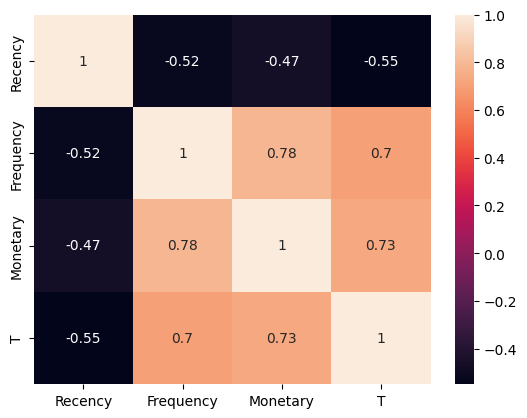

In [224]:
sns.heatmap(rfm_df.drop(labels=["LastPurchaseDate","order_date_end","order_date_start","CustomerID"], axis = 1).corr(method="spearman"),annot= True)

In [225]:
rfm_df["log_recency"] = np.log(rfm_df["Recency"])

/Users/abraham.rodriguez/Documents/machine-learning/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [226]:
rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,order_date_end,order_date_start,T,log_recency
0,12346.0,2011-01-18,325,1,77183.60,2011-01-18,2011-01-18,0,5.783825
1,12347.0,2011-12-07,2,99,3598.21,2011-12-07,2011-01-26,315,0.693147
2,12348.0,2011-09-25,75,11,904.44,2011-09-25,2011-01-25,243,4.317488
3,12349.0,2011-11-21,18,45,1757.55,2011-11-21,2011-11-21,0,2.890372
4,12350.0,2011-02-02,310,9,334.40,2011-02-02,2011-02-02,0,5.736572
...,...,...,...,...,...,...,...,...,...
4214,18280.0,2011-03-07,277,8,180.60,2011-03-07,2011-03-07,0,5.624018
4215,18281.0,2011-06-12,180,4,80.82,2011-06-12,2011-06-12,0,5.192957
4216,18282.0,2011-12-02,7,11,178.05,2011-12-02,2011-08-05,119,1.945910
4217,18283.0,2011-12-06,3,238,2094.88,2011-12-06,2011-01-06,334,1.098612


In [227]:
X = rfm_df[['Frequency','Monetary']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X);

In [228]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

/Users/abraham.rodriguez/Documents/machine-learning/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/y4/8zxsw1j55_ng2fhvfp1ypbknrj3zq7/T/ipykernel_12215/1340838970.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));


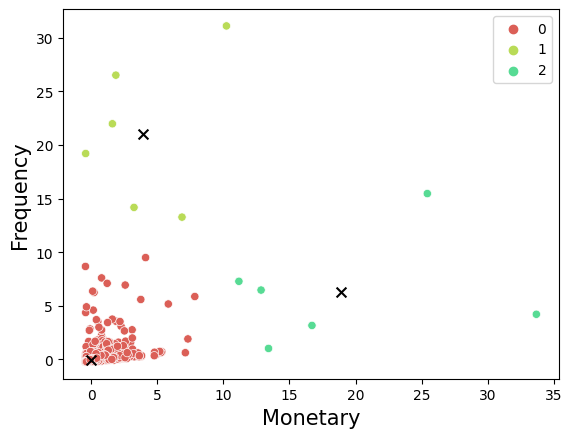

In [229]:
kmeans=KMeans(n_clusters=3,random_state=0) 
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas 
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('Monetary',fontsize=15);plt.ylabel('Frequency',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

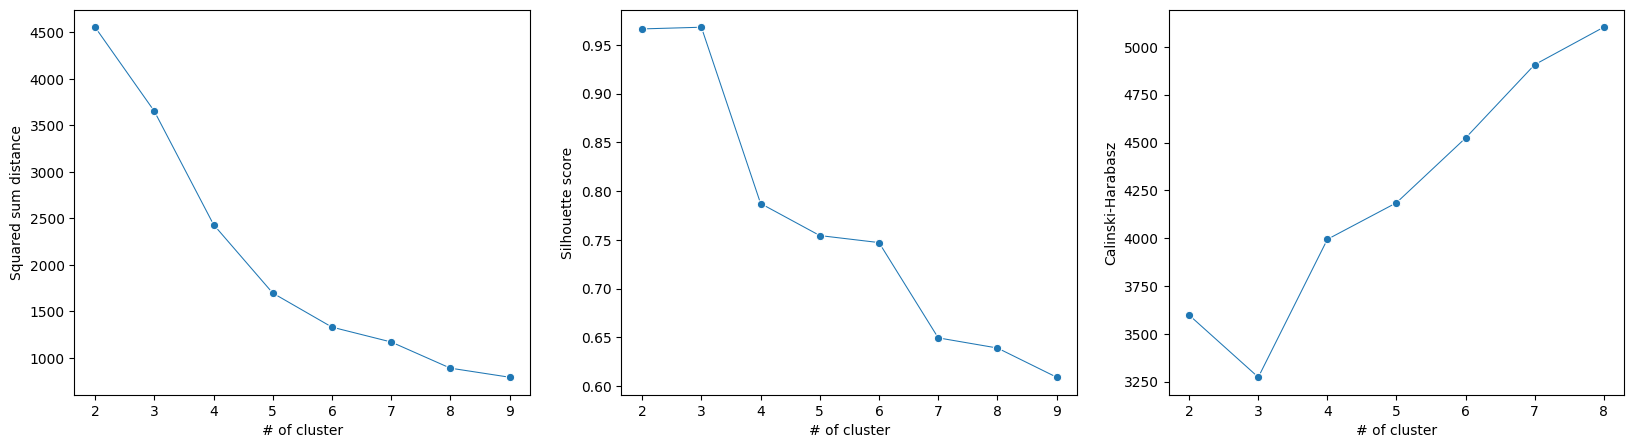

In [230]:
fig, axes = plt.subplots(1,3, figsize = (20,5))
axes = axes.ravel()
get_kmeans_ideal_cluster(X_scaled, ax = axes[0])
get_silhoutte_score(X_scaled, ax = axes[1])
get_calinski_harabasz_score(X_scaled, ax = axes[2])

posx and posy should be finite values
posx and posy should be finite values
/Users/abraham.rodriguez/Documents/machine-learning/venv/lib/python3.10/site-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values


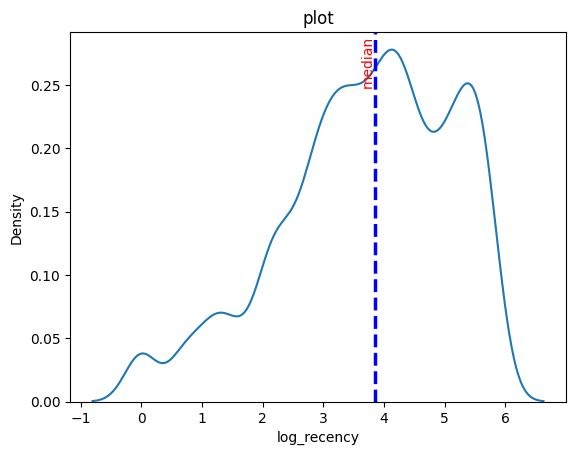

In [231]:
plot_distribution_with_info(rfm_df,col_name="log_recency", show_info= True)

In [232]:
cols = ["Recency", "Frequency","Monetary","T"]

<Axes: xlabel='order_value', ylabel='Density'>

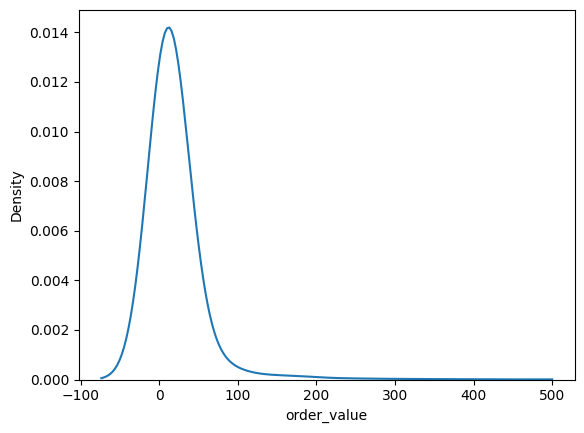

In [233]:
sns.kdeplot(df['order_value'], clip=(-1000, 500))

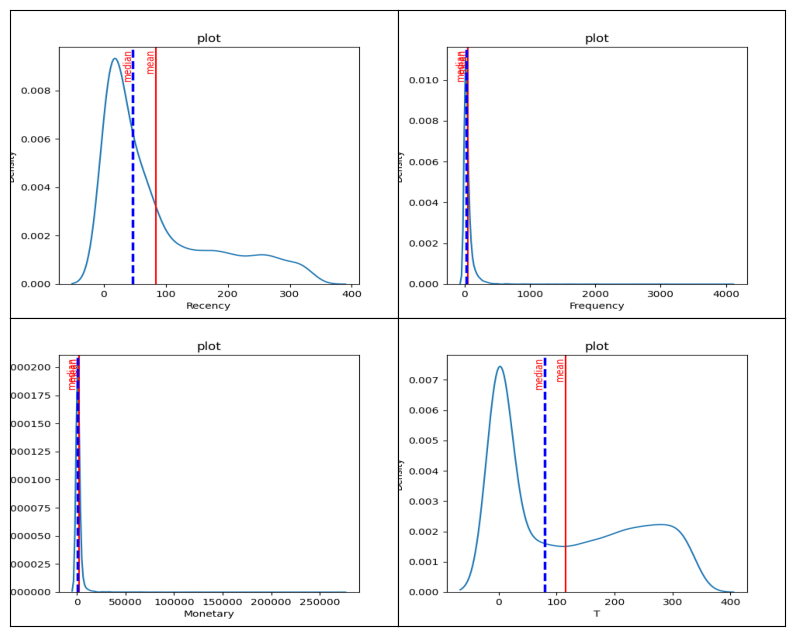

In [234]:
parallel_plot(plot_fn=plot_distribution_with_info,df=rfm_df,col_name= cols, grid_shape=(2, 2), figsize=(10, 8))

In [235]:
df_test  = df[df['order_value']<=500]

<Axes: xlabel='order_value', ylabel='Density'>

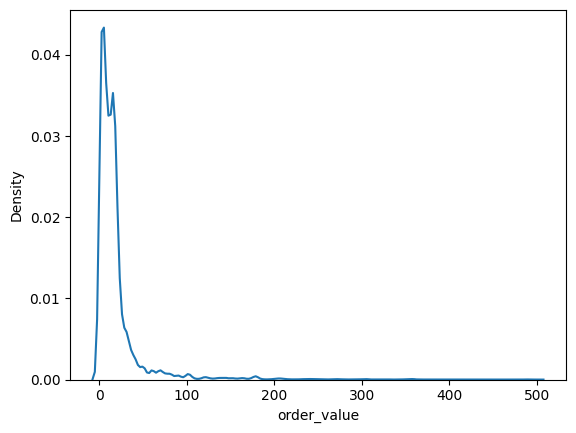

In [236]:
sns.kdeplot(df_test['order_value'])

In [237]:
rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,order_date_end,order_date_start,T,log_recency
0,12346.0,2011-01-18,325,1,77183.60,2011-01-18,2011-01-18,0,5.783825
1,12347.0,2011-12-07,2,99,3598.21,2011-12-07,2011-01-26,315,0.693147
2,12348.0,2011-09-25,75,11,904.44,2011-09-25,2011-01-25,243,4.317488
3,12349.0,2011-11-21,18,45,1757.55,2011-11-21,2011-11-21,0,2.890372
4,12350.0,2011-02-02,310,9,334.40,2011-02-02,2011-02-02,0,5.736572
...,...,...,...,...,...,...,...,...,...
4214,18280.0,2011-03-07,277,8,180.60,2011-03-07,2011-03-07,0,5.624018
4215,18281.0,2011-06-12,180,4,80.82,2011-06-12,2011-06-12,0,5.192957
4216,18282.0,2011-12-02,7,11,178.05,2011-12-02,2011-08-05,119,1.945910
4217,18283.0,2011-12-06,3,238,2094.88,2011-12-06,2011-01-06,334,1.098612


In [238]:
df

,Quantity,CustomerID,order_value,order_date,Recency
26157,10,13313.0,19.50,2011-01-04,339
26158,25,13313.0,10.50,2011-01-04,339
26159,25,13313.0,10.50,2011-01-04,339
26160,5,13313.0,10.50,2011-01-04,339
26161,10,13313.0,12.50,2011-01-04,339
...,...,...,...,...,...
397879,12,12680.0,10.20,2011-12-09,0
397880,6,12680.0,12.60,2011-12-09,0
397881,4,12680.0,16.60,2011-12-09,0
397882,4,12680.0,16.60,2011-12-09,0


In [239]:
df['MONTH_BY_YEAR'] = df['order_date'].apply(lambda x: x.strftime('%b-%Y'))
df.head()

,Quantity,CustomerID,order_value,order_date,Recency,MONTH_BY_YEAR
26157,10,13313.0,19.5,2011-01-04,339,Jan-2011
26158,25,13313.0,10.5,2011-01-04,339,Jan-2011
26159,25,13313.0,10.5,2011-01-04,339,Jan-2011
26160,5,13313.0,10.5,2011-01-04,339,Jan-2011
26161,10,13313.0,12.5,2011-01-04,339,Jan-2011


In [240]:
SALES=df.pivot_table(index=['CustomerID'],columns=['MONTH_BY_YEAR'],values='order_value',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,CustomerID,Apr-2011,Aug-2011,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.0,0.0,0.00,0.00,0.0
1,12347.0,636.25,584.91,224.82,0.0,475.39,0.0,382.52,0.0,0.0,0.00,1294.32,0.0
2,12348.0,367.00,0.00,0.00,0.0,227.44,0.0,0.00,0.0,0.0,0.00,0.00,310.0
3,12349.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1757.55,0.00,0.0
4,12350.0,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0


In [241]:
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,CustomerID,Apr-2011,Aug-2011,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.0,77183.60,0.0,0.00,0.0,0.0,0.00,0.00,0.0,77183.60
1,12347.0,636.25,584.91,224.82,0.0,475.39,0.0,382.52,0.0,0.0,0.00,1294.32,0.0,2961.96
2,12348.0,367.00,0.00,0.00,0.0,227.44,0.0,0.00,0.0,0.0,0.00,0.00,310.0,537.44
3,12349.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,1757.55,0.00,0.0,1757.55
4,12350.0,0.00,0.00,0.00,334.4,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,334.40


<Axes: xlabel='CLV', ylabel='Density'>

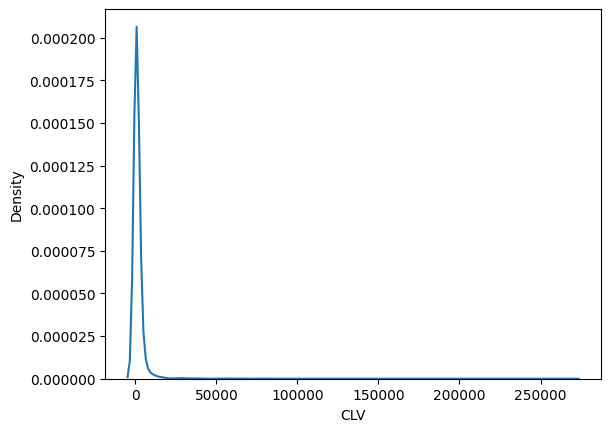

In [242]:
sns.kdeplot(SALES['CLV'])

In [243]:
SALES.CLV.describe()

count      4219.000000
mean       1865.250925
std        8481.559500
min           0.000000
25%         279.855000
50%         622.880000
75%        1521.170000
max      268637.580000
Name: CLV, dtype: float64

<Axes: xlabel='MONTH_BY_YEAR', ylabel='MONTH_BY_YEAR'>

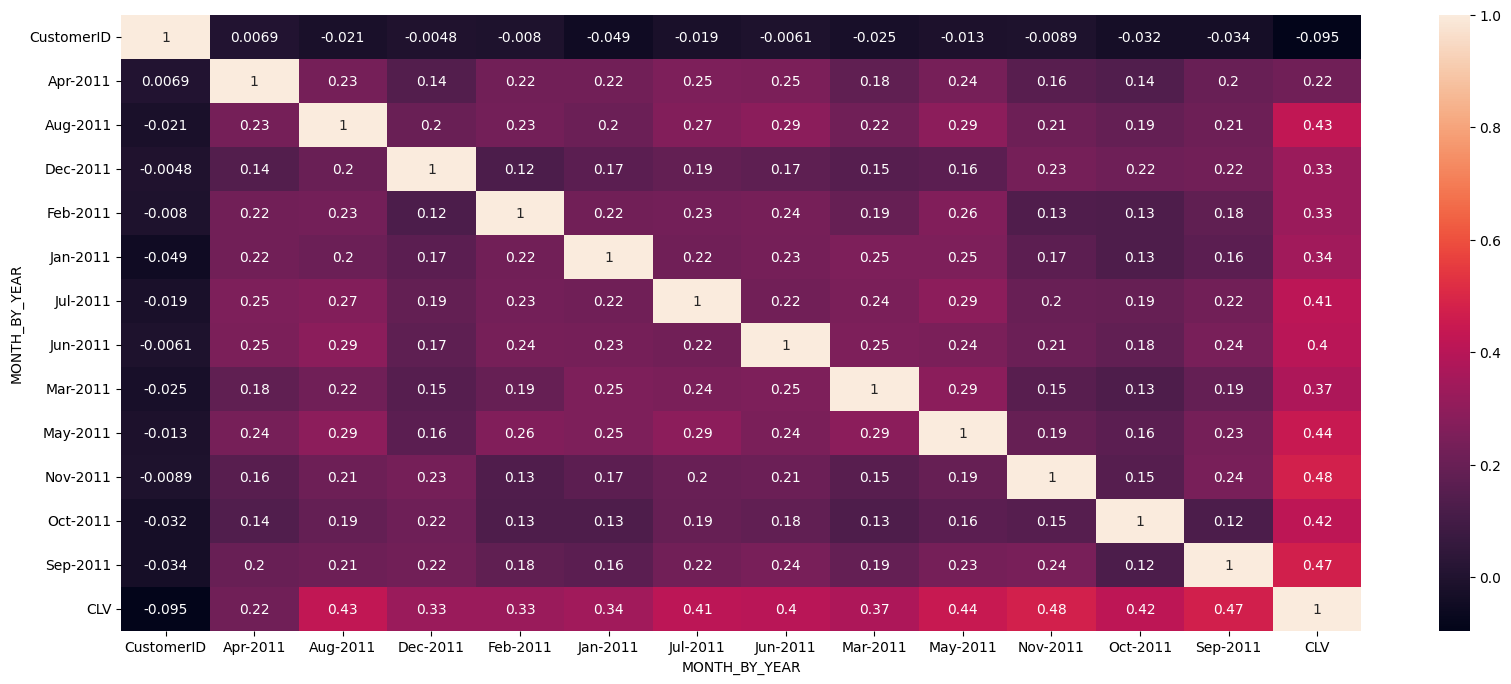

In [244]:
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(SALES.corr(method="spearman"),annot=True, ax = axes)

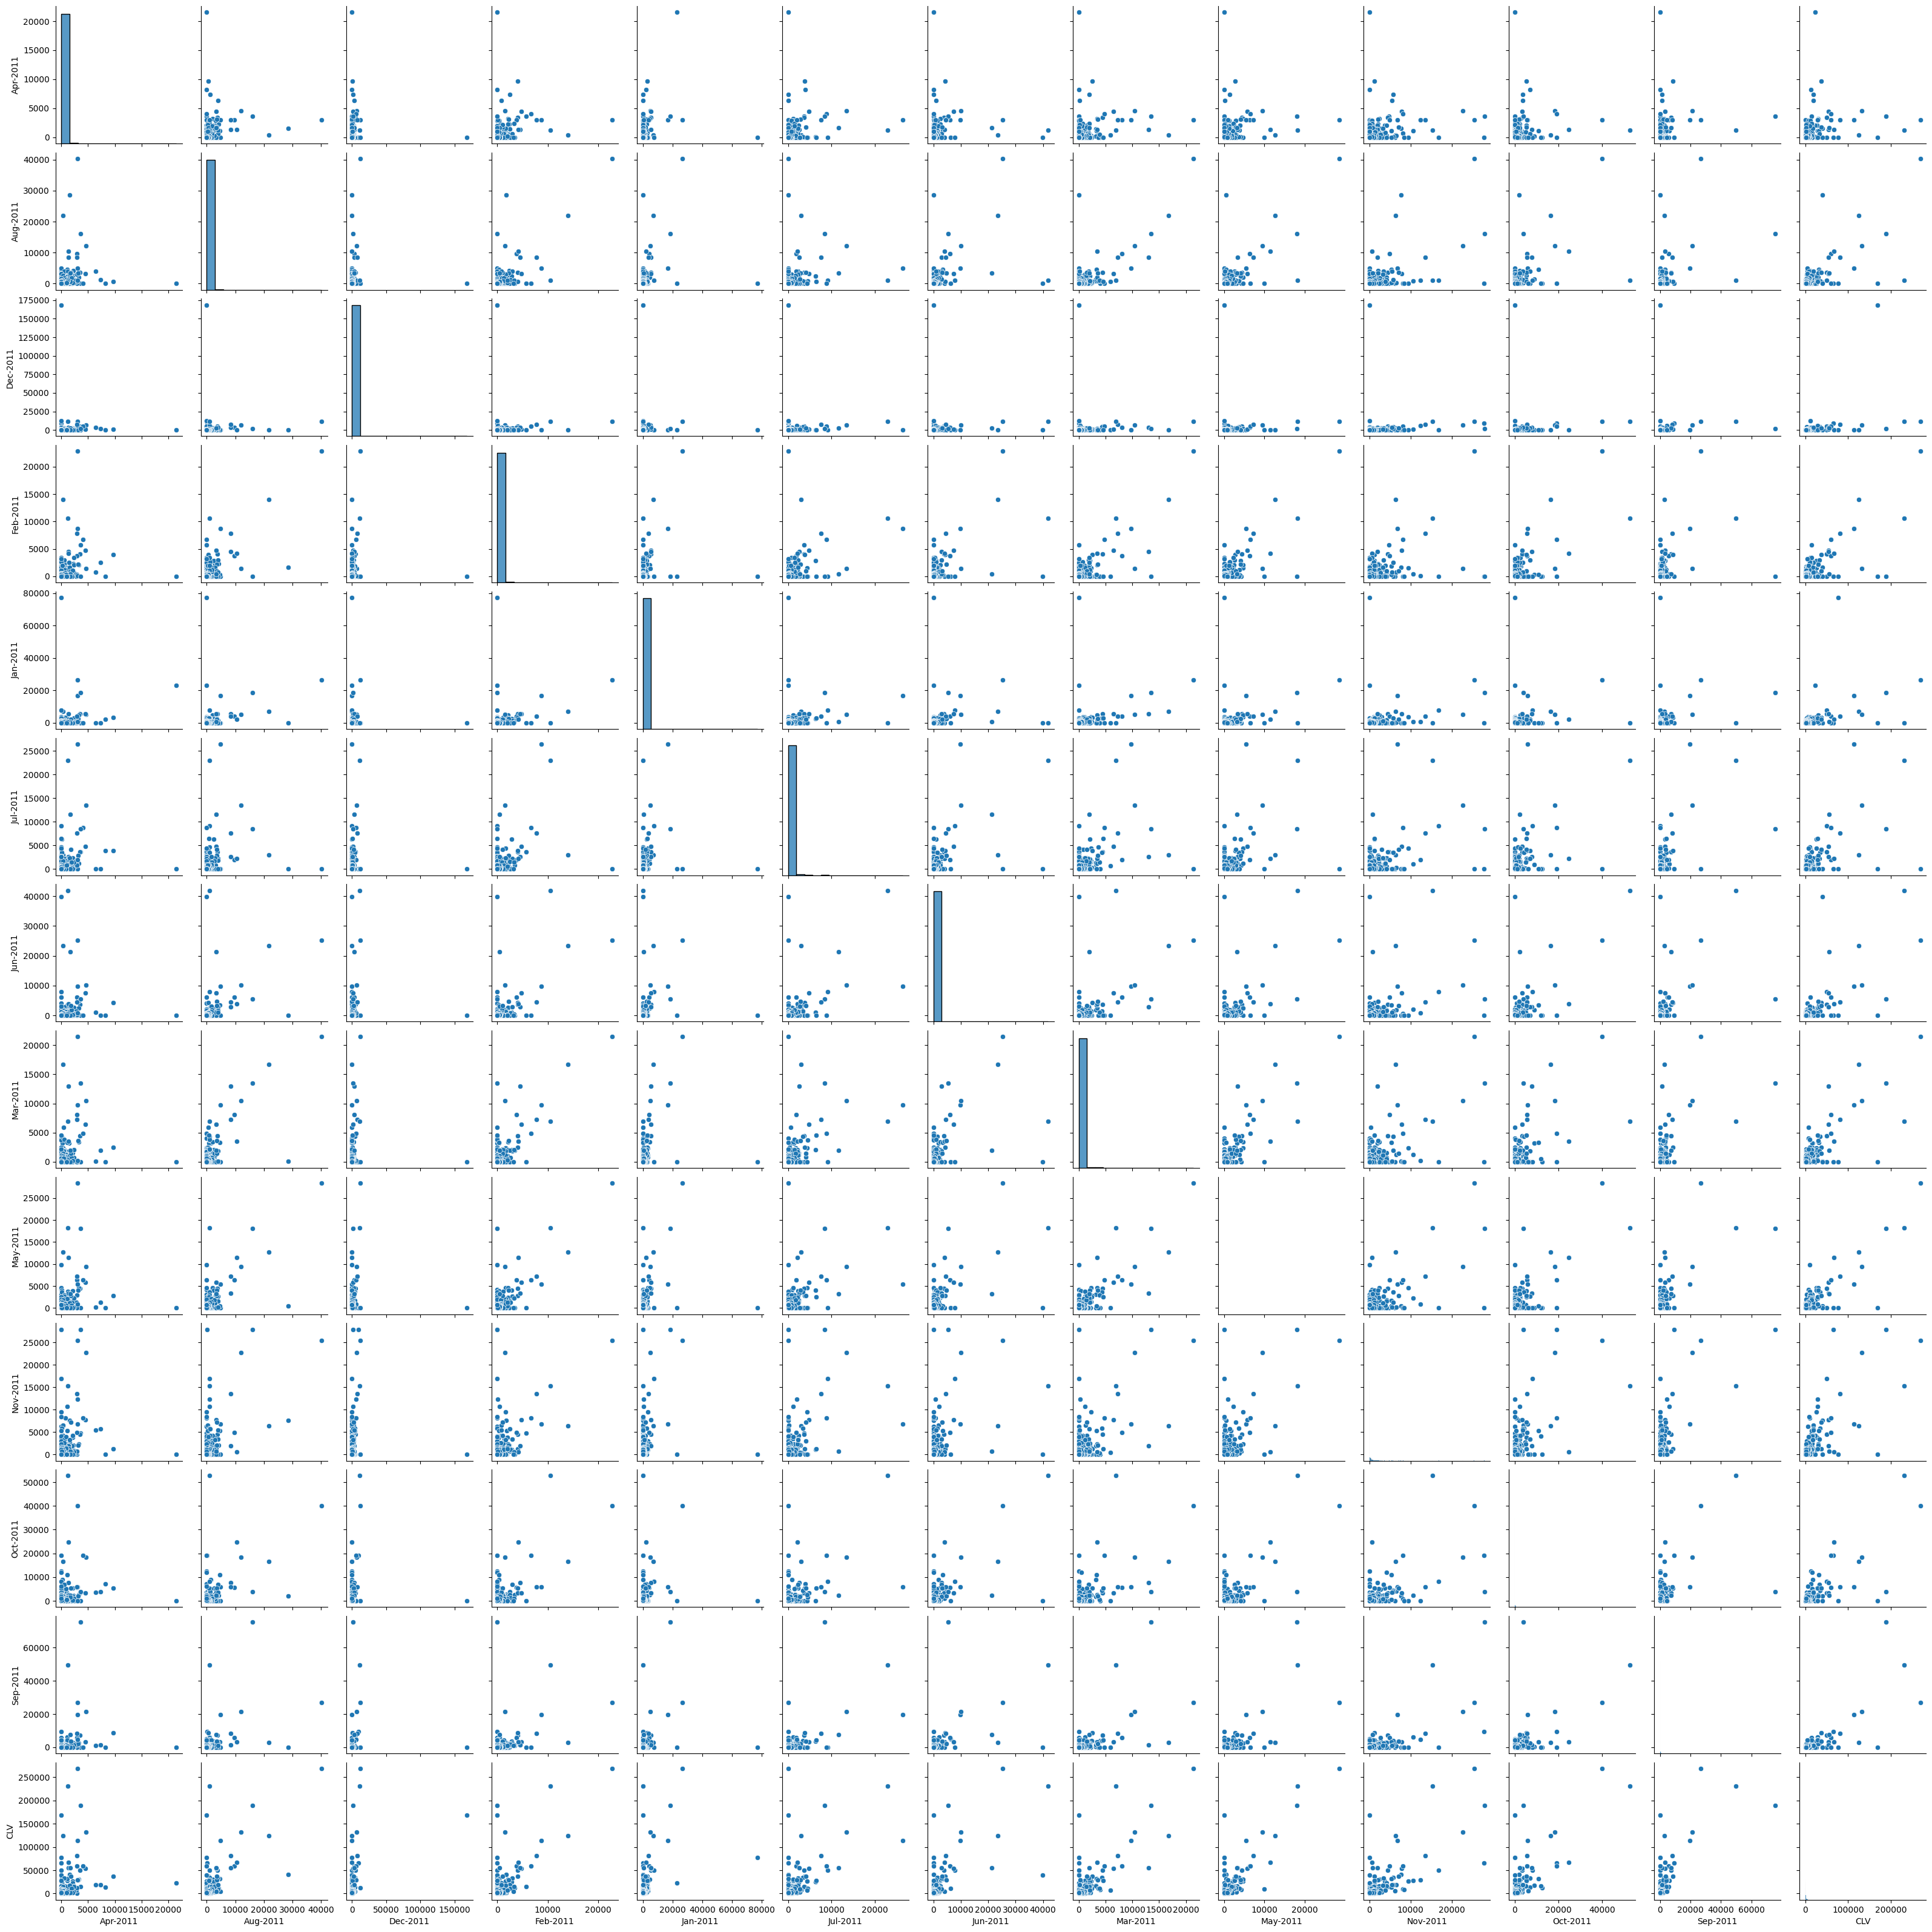

In [245]:
sns.pairplot(SALES)

In [246]:
SALES.columns

Index(['CustomerID', 'Apr-2011', 'Aug-2011', 'Dec-2011', 'Feb-2011',
       'Jan-2011', 'Jul-2011', 'Jun-2011', 'Mar-2011', 'May-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'CLV'],
      dtype='object', name='MONTH_BY_YEAR')

In [247]:
df4 = pd.DataFrame({'ID_OF_CUSTOMER': SALES['CustomerID'],
                    'Sep-2021': SALES['Sep-2011'],
                    'Aug-2011': SALES['Aug-2011'],
                    'Jul-2011': SALES['Jul-2011'],
                    'Jun-2011': SALES['Jun-2011'],
                    'May-2011': SALES['May-2011'],
                    'Apr-2011': SALES['Apr-2011'],
                    'Dec-2011': SALES['Dec-2011'],
                    'Feb-2011': SALES['Feb-2011'],
                    'Oct-2011': SALES['Oct-2011'],
                    'Mar-2011': SALES['Mar-2011'],
                    'Nov-2011': SALES['Nov-2011'],
                    'Jan-2011': SALES['Jan-2011'],
                    'Sep-2011': SALES['Sep-2011'],
                    'CLV': SALES['CLV']})
df4.head()

,ID_OF_CUSTOMER,Sep-2021,Aug-2011,Jul-2011,Jun-2011,May-2011,Apr-2011,Dec-2011,Feb-2011,Oct-2011,Mar-2011,Nov-2011,Jan-2011,Sep-2011,CLV
0,12346.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,77183.60,0.0,77183.60
1,12347.0,0.0,584.91,0.0,382.52,0.0,636.25,224.82,0.0,1294.32,0.0,0.00,475.39,0.0,2961.96
2,12348.0,310.0,0.00,0.0,0.00,0.0,367.00,0.00,0.0,0.00,0.0,0.00,227.44,310.0,537.44
3,12349.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1757.55,0.00,0.0,1757.55
4,12350.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,334.4,0.00,0.0,0.00,0.00,0.0,334.40


In [248]:
X = df4[['Jan-2011','Feb-2011','Mar-2011',
         'Apr-2011','May-2011', 'Jun-2011',
         'Jul-2011','Aug-2011','Sep-2011',
         'Oct-2011','Nov-2011','Dec-2011']]
y = df4[['CLV']]

In [249]:
y

,CLV
0,77183.60
1,2961.96
2,537.44
3,1757.55
4,334.40
...,...
4214,180.60
4215,80.82
4216,178.05
4217,1977.20


In [250]:
#X_train, X_test, Y_train, Y_test = train_test_split(rfm_df.drop(labels=["Monetary","LastPurchaseDate","log_recency","order_date_end","order_date_start","CustomerID"], axis = 1), rfm_df['Monetary'])

In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y["CLV"], test_size=0.33, random_state=42)

In [252]:
Y_test

3780    1962.84
188        0.00
2102    2247.72
3297     305.52
1822     369.20
         ...   
3778    1207.56
3388    1795.70
210     1193.32
4084     168.31
2829     564.17
Name: CLV, Length: 1393, dtype: float64

In [253]:
def set_linear_regressor(X_train, Y_train):
    regr= ElasticNet(alpha=0.1, l1_ratio=0.5, random_state= True)
    regr.fit(X_train,Y_train)
    return regr
    
def get_linear_metrics(model, X_test, Y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    abs = mean_absolute_error(Y_test, predictions)
    sqr = mean_squared_error(Y_test, predictions)
    print(f"R2 score: {r2}, MAS: {abs}, MSE: {sqr}")
    return predictions

In [254]:
X_train

,Jan-2011,Feb-2011,Mar-2011,Apr-2011,May-2011,Jun-2011,Jul-2011,Aug-2011,Sep-2011,Oct-2011,Nov-2011,Dec-2011
59,157.45,0.0,0.0,0.00,0.00,239.35,0.0,231.76,0.0,0.00,178.48,0.00
1211,0.00,0.0,0.0,0.00,0.00,0.00,165.2,0.00,0.0,302.46,0.00,0.00
2256,970.60,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,291.60,0.00
1650,0.00,0.0,0.0,0.00,0.00,335.87,0.0,0.00,0.0,0.00,0.00,0.00
4160,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,139.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.00,0.0,0.0,0.00,59.90,0.00,0.0,0.00,0.0,0.00,0.00,0.00
466,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,160.18,0.00
3092,464.82,0.0,0.0,329.24,304.44,0.00,0.0,0.00,0.0,0.00,493.62,0.00
3772,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,133.06,0.00,0.00


In [255]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
regr = set_linear_regressor(X_train, Y_train)
predictions = get_linear_metrics(regr,X_test,Y_test)

R2 score: 0.9999999977341189, MAS: 0.1183997254435795, MSE: 0.38178959050176214


<Axes: xlabel='CLV', ylabel='Density'>

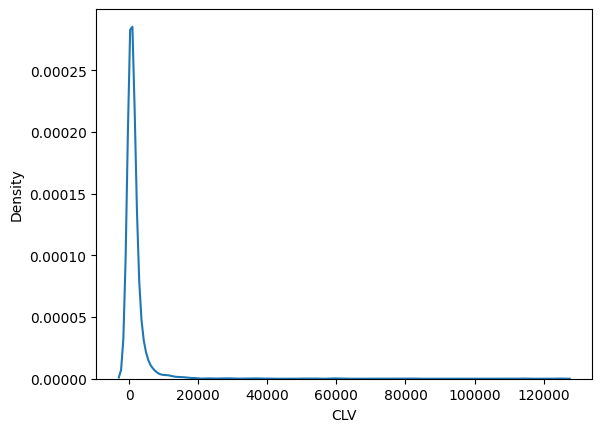

In [256]:
sns.kdeplot(Y_train)

# RandomForest

In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [258]:
def set_forest_regressor(X_train,Y_train, find_best = True):

    clf = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=6, random_state=42)

    if find_best:
        params = {'n_estimators':[10,100,500,2000],'max_depth':[1,3,5,7], 'criterion':["squared_error"], 'random_state':[42]}
        clf = GridSearchCV(RandomForestRegressor(), params, cv=5, n_jobs=-1,verbose=2)
        clf.fit(X_train,Y_train)
        print(clf.best_params_)
        best = clf.best_estimator_
        return best
    clf.fit(X_train,Y_train)
    
    return clf

In [259]:
forest = set_forest_regressor(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, m

In [260]:
forest.estimators_[5].feature_importances_

array([0.02665982, 0.00929186, 0.18664231, 0.00205299, 0.08101489,
       0.02783073, 0.01113879, 0.        , 0.00420646, 0.60522342,
       0.03433515, 0.01160358])

In [261]:
forest_predictions = get_linear_metrics(forest, X_test, Y_test)

R2 score: 0.56922316356865, MAS: 1082.4409181872356, MSE: 72583734.0414113


[Text(0.7014627659574468, 0.9375, 'x[9] <= 3015.0\nsquared_error = 22136195.471\nsamples = 1813\nvalue = 1616.821'),
 Text(0.4800531914893617, 0.8125, 'x[4] <= 1162.315\nsquared_error = 4910363.41\nsamples = 1798\nvalue = 1305.731'),
 Text(0.23404255319148937, 0.6875, 'x[10] <= 524.16\nsquared_error = 2563567.853\nsamples = 1772\nvalue = 1151.368'),
 Text(0.0851063829787234, 0.5625, 'x[2] <= 356.825\nsquared_error = 1248779.823\nsamples = 1559\nvalue = 831.973'),
 Text(0.0425531914893617, 0.4375, 'x[0] <= 12694.995\nsquared_error = 887294.67\nsamples = 1426\nvalue = 698.551'),
 Text(0.031914893617021274, 0.3125, 'x[11] <= 8127.35\nsquared_error = 666182.742\nsamples = 1425\nvalue = 688.622'),
 Text(0.02127659574468085, 0.1875, 'x[9] <= 430.65\nsquared_error = 544556.379\nsamples = 1424\nvalue = 678.19'),
 Text(0.010638297872340425, 0.0625, 'squared_error = 376238.38\nsamples = 1300\nvalue = 586.718'),
 Text(0.031914893617021274, 0.0625, 'squared_error = 1284687.786\nsamples = 124\nvalu

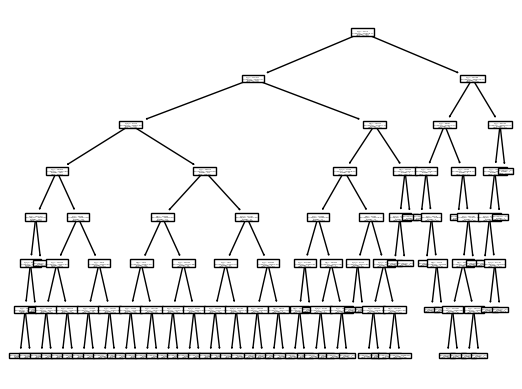

In [262]:
plot_tree(forest.estimators_[5])

In [263]:
def set_decision_tree(X_train,Y_train):
    tree = DecisionTreeRegressor(max_depth=6,random_state=42)
    tree.fit(X_train,Y_train)
    return tree

In [264]:
tree = set_decision_tree(X_train,Y_train)

In [265]:
tree.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeRegressor(max_depth=6, random_state=42)>

In [266]:
tree_predictions = get_linear_metrics(tree, X_test,Y_test)

R2 score: 0.5899969751755305, MAS: 1330.546864493228, MSE: 69083451.08935778


In [267]:
Y_train.min()

0.0

In [268]:
y_train = pd.Series(pd.cut(np.array(Y_train),[1000,5000,10000,20000,40000,100000,200000],include_lowest=True))
y_test = pd.Series(pd.cut(np.array(Y_test),[1000,5000,10000,20000,40000,100000,200000],include_lowest=True))
print(y_test.value_counts())

(999.999, 5000.0]       421
(5000.0, 10000.0]        38
(10000.0, 20000.0]       14
(40000.0, 100000.0]       7
(20000.0, 40000.0]        5
(100000.0, 200000.0]      3
Name: count, dtype: int64


In [269]:
y_train[y_train.isna() == True]

0       NaN
1       NaN
3       NaN
4       NaN
5       NaN
       ... 
2819    NaN
2820    NaN
2821    NaN
2822    NaN
2824    NaN
Length: 1792, dtype: category
Categories (6, interval[float64, right]): [(999.999, 5000.0] < (5000.0, 10000.0] < (10000.0, 20000.0] < (20000.0, 40000.0] < (40000.0, 100000.0] < (100000.0, 200000.0]]

In [270]:
forest = set_forest_regressor(X_train, y_train.cat.codes)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=10, random_state=42; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, max_depth=1, n_estimators=100, random_state=42; total time=   0.1s
[CV] END criterion=squared_error, m

In [271]:
forest_predictions = get_linear_metrics(forest, X_test, y_test.cat.codes)

R2 score: 0.703287213733876, MAS: 0.22883649151458094, MSE: 0.1689376087431886


[Text(0.6391447368421053, 0.9375, 'x[10] <= 1054.485\nsquared_error = 0.496\nsamples = 1813\nvalue = -0.566'),
 Text(0.4085526315789474, 0.8125, 'x[4] <= 341.48\nsquared_error = 0.28\nsamples = 1713\nvalue = -0.658'),
 Text(0.2394736842105263, 0.6875, 'x[9] <= 431.305\nsquared_error = 0.215\nsamples = 1532\nvalue = -0.733'),
 Text(0.14210526315789473, 0.5625, 'x[8] <= 253.73\nsquared_error = 0.182\nsamples = 1380\nvalue = -0.789'),
 Text(0.07894736842105263, 0.4375, 'x[7] <= 353.52\nsquared_error = 0.132\nsamples = 1147\nvalue = -0.863'),
 Text(0.042105263157894736, 0.3125, 'x[0] <= 381.0\nsquared_error = 0.111\nsamples = 1091\nvalue = -0.891'),
 Text(0.021052631578947368, 0.1875, 'x[2] <= 467.46\nsquared_error = 0.091\nsamples = 1060\nvalue = -0.908'),
 Text(0.010526315789473684, 0.0625, 'squared_error = 0.078\nsamples = 1037\nvalue = -0.923'),
 Text(0.031578947368421054, 0.0625, 'squared_error = 0.169\nsamples = 23\nvalue = -0.216'),
 Text(0.06315789473684211, 0.1875, 'x[3] <= 11008.

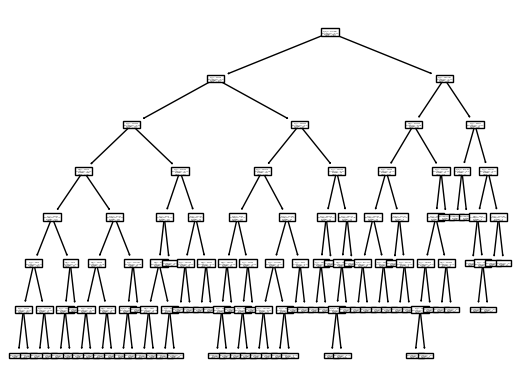

In [272]:
plot_tree(forest.estimators_[5])

In [273]:
def plot_learning_curve(model, X_train, X_test, y_train, y_test, nsteps=1, figsize=(6, 5), title=''):
    train_error, test_error = [], []
    number_of_samples = []
    m_samples = X_train.shape[0]
    for m in range(int(m_samples/nsteps), m_samples+1, int(m_samples/nsteps)):
        number_of_samples.append(m)
        model.fit(X_train.iloc[:m,:], y_train.iloc[:m])
        y_train_pred = model.predict(X_train.iloc[:m,:])
        train_error.append(np.sqrt(mean_squared_error(y_train.iloc[:m], y_train_pred)))
        y_test_pred = model.predict(X_test)
        test_error.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    plt.figure(figsize=figsize)
    plt.plot(number_of_samples, train_error, label='Training data')
    plt.plot(number_of_samples, test_error, label='Test data')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    if title!='':
        plt.title(title)

In [274]:
rf_plot = RandomForestRegressor(n_estimators = 100,n_jobs = -1, max_depth = 4, random_state = 42)

In [275]:
regr_plot = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state= True)

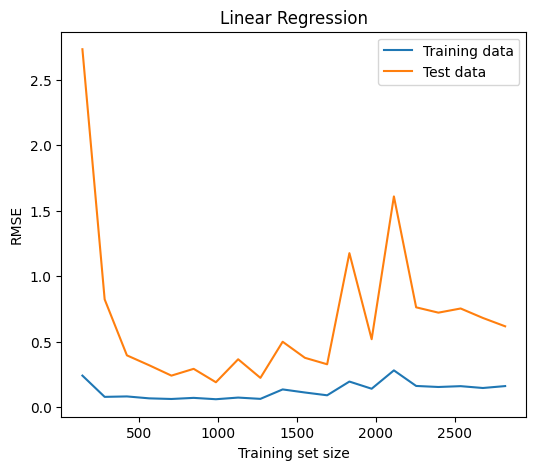

In [276]:
plot_learning_curve(regr_plot, X_train, X_test, Y_train, Y_test, nsteps=20, title = "Linear Regression")

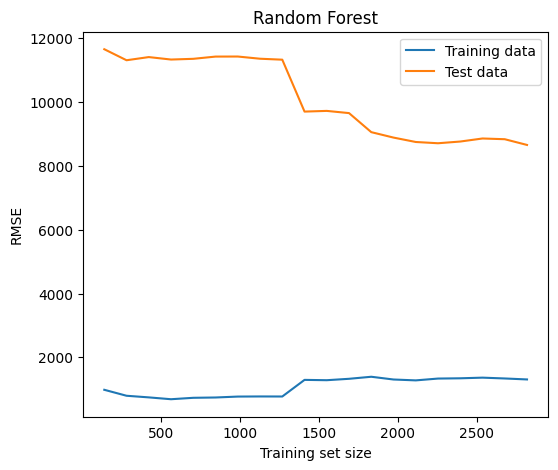

In [277]:

plot_learning_curve(rf_plot, X_train, X_test, Y_train, Y_test, nsteps=20, title = "Random Forest")

In [278]:
data = {'productivity': [40, 80, 60, 70, 90],
        'duedate': ["2023-05-08","2023-05-09","2023-05-10","2023-05-11","2023-05-12"],
       }

df = pd.DataFrame(data)
df['duedate'] =  pd.to_datetime(df['duedate'])
df['day'] = df['duedate'].dt.day_name()

<Axes: ylabel='Density'>

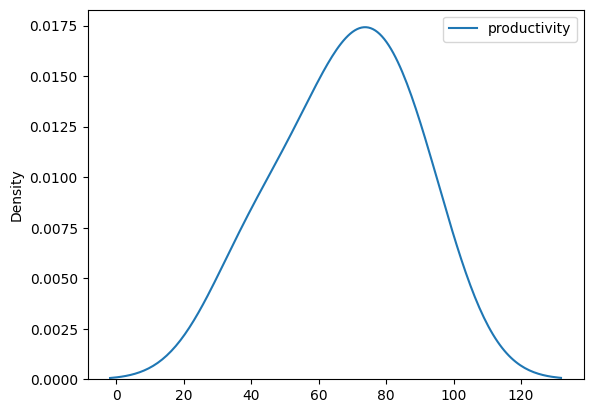

In [279]:
sns.kdeplot(df[['day', 'productivity']].groupby('day',sort= False).sum())

In [280]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

In [281]:
tfd = tfp.distributions

In [282]:
normal = tfd.LogNormal(loc = 0,scale=0.01)

<Axes: ylabel='Density'>

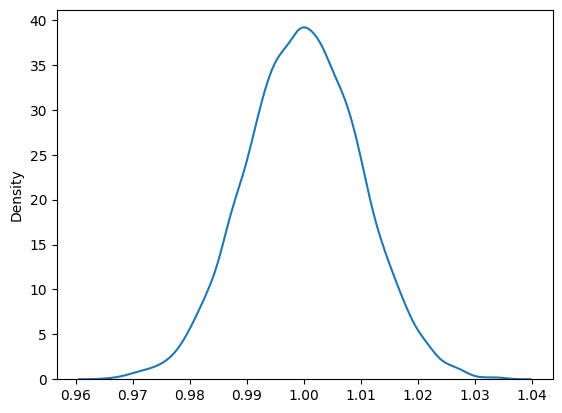

In [283]:
sns.kdeplot(normal.sample(1e4))

In [284]:
class CLVNeuralNetwork():
    def __init__(self):
        self.model = None

    def build_model(self, shape:list):
        data_normalizer = tf.keras.layers.Input(shape =shape, name= 'numeric')
        model_input = tf.keras.layers.concatenate([data_normalizer])
        model = tf.keras.Sequential([
            #norm,
            #tf.keras.Input(shape=(12,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        self.model = tf.keras.Model(inputs = data_normalizer, outputs = model(model_input))

    
    
    def compile_model(self, lr : float = 0.001):
        self.model.compile(loss=tf.keras.losses.mean_squared_logarithmic_error,
                        
                        metrics =['MeanAbsoluteError',
                                  'MeanSquaredError',
                                  
                        ],
                        optimizer=tf.keras.optimizers.legacy.Adam(lr))
        return self.model

    def compile_and_build(self, shape :list ):
        self.build_model(shape)
        return self.compile_model()
        
    def log_normal_loss():
        pass

In [285]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [286]:
data_normalizer = tf.keras.layers.Input(shape =[12,], name= 'numeric')
#data_normalizer(X_train)

In [287]:
X_train_sample = X_train.iloc[:,6:]
X_test_sample = X_test.iloc[:,6:]

In [303]:
DNN = CLVNeuralNetwork()
model = DNN.compile_and_build(shape=[X_train.shape[1],])

In [289]:
X_train_tf = tf.convert_to_tensor(X_train)

In [304]:
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2, epochs=100)

Epoch 1/100
71/71 [==============================] - 0s 2ms/step - loss: 4.5803 - mean_absolute_error: 1367.7314 - mean_squared_error: 21253536.0000 - val_loss: 1.1243 - val_mean_absolute_error: 947.1120 - val_mean_squared_error: 7538135.5000
Epoch 2/100
71/71 [==============================] - 0s 902us/step - loss: 1.1398 - mean_absolute_error: 1046.0383 - mean_squared_error: 15766813.0000 - val_loss: 0.5307 - val_mean_absolute_error: 721.3332 - val_mean_squared_error: 5293155.5000
Epoch 3/100
71/71 [==============================] - 0s 854us/step - loss: 0.3516 - mean_absolute_error: 780.3465 - mean_squared_error: 9414622.0000 - val_loss: 0.1364 - val_mean_absolute_error: 529.5919 - val_mean_squared_error: 3150524.5000
Epoch 4/100
71/71 [==============================] - 0s 931us/step - loss: 0.1052 - mean_absolute_error: 574.0687 - mean_squared_error: 5785901.0000 - val_loss: 0.0838 - val_mean_absolute_error: 399.4119 - val_mean_squared_error: 1810427.7500
Epoch 5/100
71/71 [=======

In [307]:
model.evaluate(X_test, Y_test, steps= None,)

44/44 [==============================] - 0s 708us/step - loss: 0.0189 - mean_absolute_error: 18.2120 - mean_squared_error: 6354.8354


[0.018861861899495125, 18.211977005004883, 6354.83544921875]

In [305]:
dnn_predictions= model.predict(X_test, 
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

44/44 [==============================] - 0s 338us/step


In [308]:
dnn_predictions= dnn_predictions.reshape(dnn_predictions.shape[0])

[Text(0.5, 1.0, 'Neural Net Regression')]

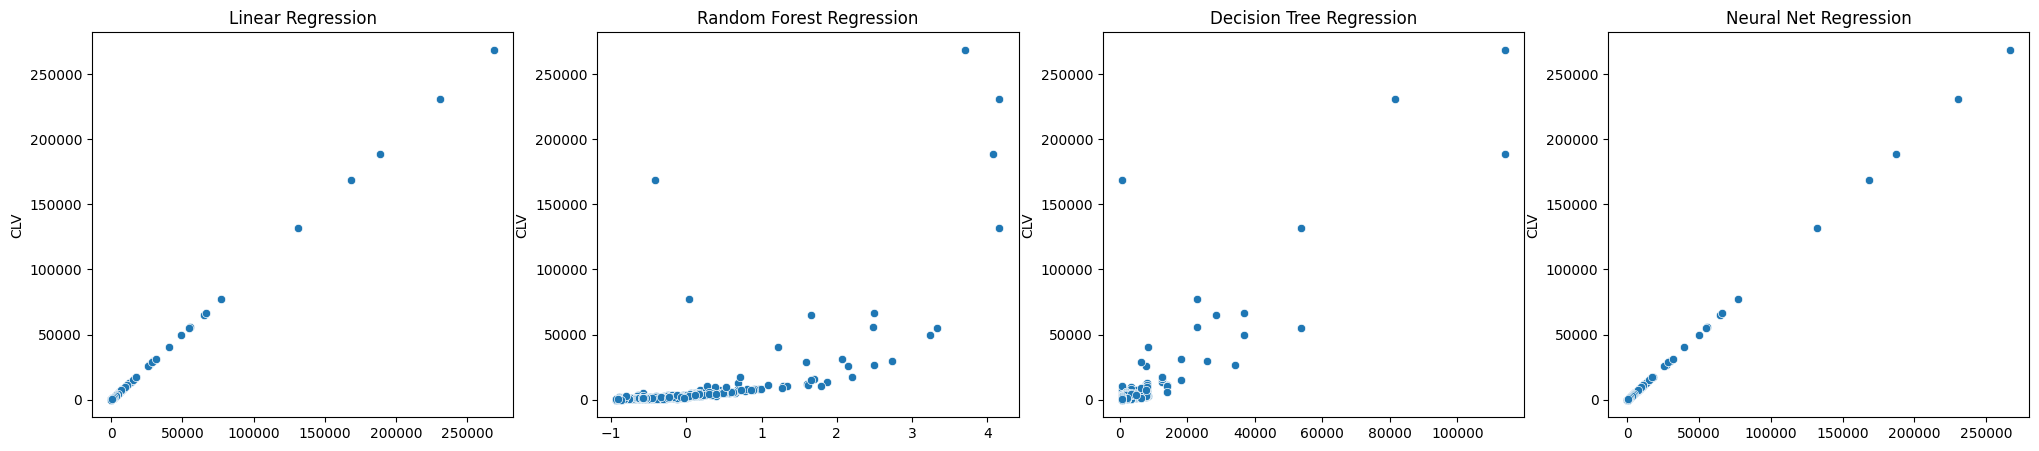

In [309]:
fig, axes = plt.subplots(1,4, figsize= (25,5))
axes = axes.ravel()

sns.scatterplot(x = predictions, y = Y_test, ax = axes[0]).set(title="Linear Regression")
sns.scatterplot(x = forest_predictions, y = Y_test, ax = axes[1]).set(title="Random Forest Regression")
sns.scatterplot(x = tree_predictions, y = Y_test, ax=axes[2]).set(title="Decision Tree Regression")
sns.scatterplot(x = dnn_predictions, y = Y_test,ax =axes[3]).set(title="Neural Net Regression")

In [310]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

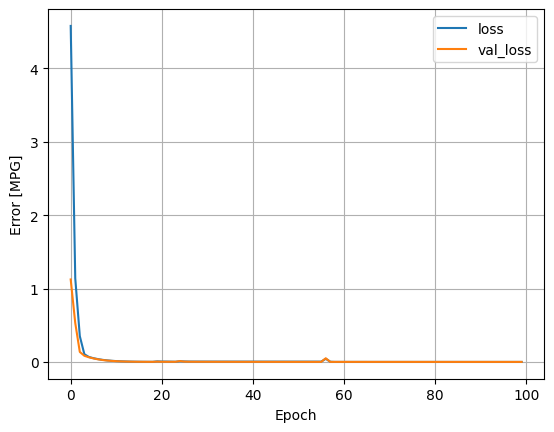

In [311]:
plot_loss(history)